# TP : Régression Linéaire

In [44]:
#Imports

%matplotlib notebook
import math                         
import numpy as np                  
from sklearn import linear_model as lm    
import pandas as pd
import matplotlib.pyplot as plt     
import seaborn as sns               
import sys
from statistics import mean
from numpy.linalg import inv
import statsmodels.regression.linear_model as sm

sns.set_palette("colorblind")
color_blind_list = sns.color_palette("colorblind", 8)

### Question 1

Importer la base de données “invest.txt” et l’afficher dans une forme lisible, e.g. une table contenant
les 5 premières observations.

In [45]:
import pandas as pd

df = pd.read_csv('https://maelfabien.github.io/myblog/files/housing.txt', sep=" ")
df

,year,gdp,house
0,1990,18873.4,133.3
1,1991,18944.0,149.3
2,1992,18992.7,144.2
3,1993,19077.6,166.4
4,1994,20185.9,195.0
5,1995,20326.4,229.8
6,1996,20434.2,228.7
7,1997,20549.2,206.1
8,1998,20718.0,257.9
9,1999,20918.3,324.1


### Question 2

Réaliser le graph suivant : la variable “Gross National Product” (GNP, column “gnp”) est en abscisse
et la variable “Investment” (column “invest”) est en ordonnée. Transformer les 2 variables précédentes
en échelle logarithmique. Nous travaillerons désormais avec les 2 nouvelles variables.

<IPython.core.display.Javascript object>


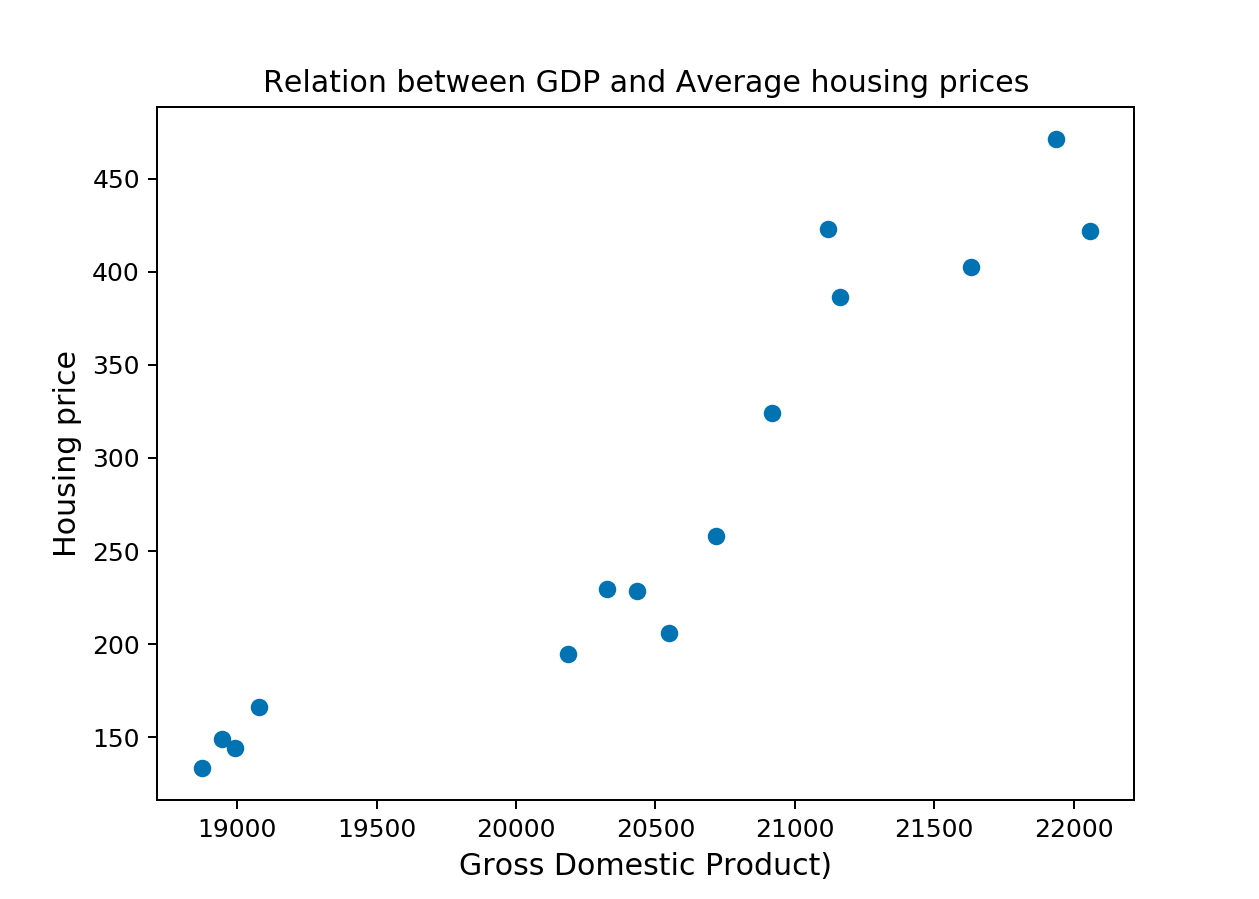

In [46]:
#Scatter plot
plt.figure(figsize=(7,5))
plt.scatter(df['gdp'], df['house'])

#On ajoute les titres des axes
plt.xlabel("Gross Domestic Product)", fontsize = 12)
plt.ylabel("Housing price", fontsize = 12)
plt.title("Relation between GDP and Average housing prices")

plt.show()

Les questions suivantes (3 à 6) doivent être réalisées par l’intermédiaire d’opérations élémentaires,
sans utiliser de librairies existantes.

### Question 3

Pour la régression de ”Investment” (variable à expliquer, output) sur ”GNP” (variable explicative,
covariable), estimer l’intercept et la pente, leurs écart-types, ainsi que le coefficient de détermination.
Les afficher dans une forme lisible. Dans la suite le vecteur contenant l’intercept et la pente est noté
θn dans R^2.

In [47]:
%%latex
La pente de notre régression linéaire OLS est donnée par :
\begin{equation}
\hat{\beta}_1 = \frac{\sum(X_i – \bar{X}) (Y_i – \bar{Y})} {\sum(X_i – \bar{X})^2}
\end{equation}

<IPython.core.display.Latex object>

In [48]:
# Pente Beta 1 :
x = df['gdp']
x_bar = mean(df['gdp'])
y = df['house']
y_bar = mean(df['house'])

beta1 = ((x - x_bar)*(y-y_bar)).sum() / ((x-x_bar)**2).sum()
print("Notre estimation de la pente de la régression est : " + str(round(beta1,4)))

Notre estimation de la pente de la régression est : 0.1012


In [49]:
%%latex
Et pour l'intercept : 
\begin{equation}
\hat{\beta}_0 = \bar{Y} – \hat{\beta}_1 \bar{X}
\end{equation}

<IPython.core.display.Latex object>

In [50]:
# Intercept Beta 0 :
beta0 = y_bar - beta1 * x_bar
print("Notre estimation de l'intercept est : " + str(round(beta0,4)))

Notre estimation de l'intercept est : -1794.0861


<IPython.core.display.Javascript object>


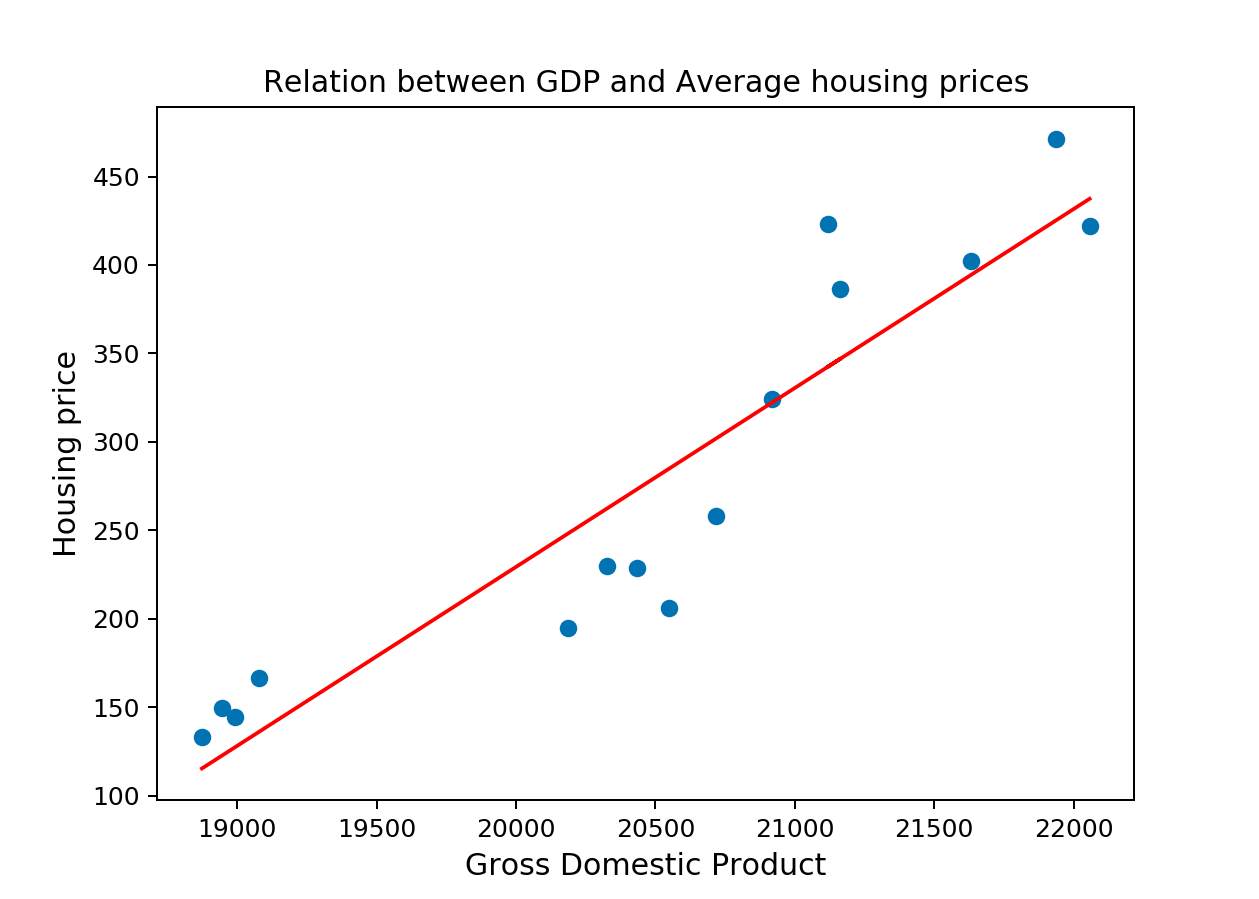

In [70]:
#Scatter plot
plt.figure(figsize=(7,5))
plt.scatter(df['gdp'], df['house'])
plt.plot(df['gdp'], beta1 * df['gdp'] + beta0, c='r')
#On ajoute les titres des axes
plt.xlabel("Gross Domestic Product", fontsize = 12)
plt.ylabel("Housing price", fontsize = 12)
plt.title("Relation between GDP and Average housing prices")

plt.show()

Nos estimations des paramètres sont réalisées. Il nous reste à déterminer leurs écarts-types individuels. Rappellons que :

In [52]:
%%latex
\begin{equation}
\hat{\sigma} = \sqrt\frac{\sum(Y_i – \hat{Y}_i)^2} {n – 2}
\end{equation}

<IPython.core.display.Latex object>

In [53]:
# On calcule Sigma_Hat de cette manière :
sigma = math.sqrt(((y - beta0 - beta1 * x)**2).sum()/(len(y)-2))
sigma2 = sigma ** 2
print("L'écart-type totale estimé est : " + str(round(sigma,4)))

L'écart-type totale estimé est : 45.3657


In [54]:
%%latex
L'erreur standard de Beta1 est :
\begin{equation}
\hat{\sigma}{_\hat{\beta_1}} = \frac{\hat{\sigma}} {\sqrt{\sum(X_i – \bar{X})^2}}
\end{equation}

<IPython.core.display.Latex object>

In [55]:
# On en déduit l'erreur standard de Beta1 :
sigma_beta1 = math.sqrt(sigma2 / ((x-x_bar)**2).sum())
print("L'écart-type de notre paramètre Beta1 estimée est : " + str(round(sigma_beta1,4)))

L'écart-type de notre paramètre Beta1 estimée est : 0.0112


In [56]:
%%latex
L'erreur standard de Beta0 est :
\begin{equation}
\hat{\sigma}{_\hat{\beta_0}} = \hat{\sigma} \sqrt{\frac{1} {n} + \frac{\sum(X_i)^2} {\sum(X_i – \bar{X})^2}}
\end{equation}

<IPython.core.display.Latex object>

In [57]:
# Et l'erreur standard de Beta0 :
sigma_beta0 = math.sqrt(sigma2 * (1/len(y) + (x_bar**2)/((x-x_bar)**2).sum()))
print("L'écart-type de notre paramètre Beta0 estimée est : " + str(round(sigma_beta0,4)))

L'écart-type de notre paramètre Beta0 estimée est : 230.2374


In [58]:
%%latex
Le coefficient de détermination est :
\begin{equation}
{R^2} = \frac{\sum(Y_i – \hat{Y})^2} {\sum(Y_i – \bar{Y})^2}
\end{equation}

<IPython.core.display.Latex object>

In [60]:
# Pour le coefficient de détermination :
r_carre = 1 - (((y-(beta0 + beta1 * x))**2).sum())/((y-y_bar)**2).sum()
print("Enfin, le coefficient de détermination associé au modèle est : " + str(round(r_carre,4)))

Enfin, le coefficient de détermination associé au modèle est : 0.8618


### Question 4

La pente estimée précédemment est-elle statistiquement significative ? On fera un test de student
(t-test). Donner la valeur de la statistique de test ainsi que la p-valeur.

In [64]:
# T-test
from scipy import stats
t_crit = stats.t.ppf(0.975,df=len(y) - 2)

# Sum mean to the confidence interval
c0 = beta1 - t_crit * sigma_beta1
c1 = beta1 + t_crit * sigma_beta1

print ("Pente estimée Beta1 : %f" % beta1)
print ("Intervalle de confiance autour de l'estimation = [ %f, %f]" % (c0, c1))

Pente estimée Beta1 : 0.101168
Intervalle de confiance autour de l'estimation = [ 0.076891, 0.125445]


La moyenne est dans l'intervalle de confiance ce qui mène à un rejet de l'hypothèse nulle H0 au seuil Alpha = 0.05.

In [65]:
# p-value
t_test = beta1 / sigma_beta1
print("The T-Stat is : " + str(round(t_test,4)))
p = (1 - stats.t.cdf(abs(t_test), len(df)-2)) * 2
print("The p-value is : " + str(round(p,10)))

The T-Stat is : 9.0028
The p-value is : 6e-07


Notre p-value est bien en dessous de notre seuil Alpha = 5% ce qui conforte notre rejet de l'hypothèse nulle H0.

### Question 5

Pour GNP égal à 1000, estimer l’investissement prédit par le modèle. Pour GNP égal à 1000, donner
l’intervalle de confiance pour la valeur prédite et l’intervalle de confiance pour la variable à expliquer
“Investment”, au niveau 90%. On pourra se référer à la section 3.1.3 “Confidence intervals
for the predicted values” du polycopié dans laquelle chaque intervalle est défini, CI et PI,
respectivement (avec les notations du polycopié, x = (1, 1000)T )

In [66]:
# Pour un GNP = 1000, l'investissement prédit est :
y_hat = beta0 + beta1 * np.log(1000)
y_pred = float((beta0 + beta1 * np.log(1000)) + np.random.normal(0,sigma))
print("L'estimation selon le modèle en log est : " + str(round(y_hat,4)))

L'estimation selon le modèle en log est : -1793.3872


In [69]:
#Déterminons maintenant un intervalle de confiance autour de notre prédiction
sigma_old_1000 = math.sqrt(sigma2 * (1/len(y) + (np.log(1000) - x_bar)**2/((x-x_bar)**2).sum()))

sigma_new_1000 = math.sqrt(sigma2 * (1 + 1/len(y) + (np.log(1000) - x_bar)**2/((x-x_bar)**2).sum()))

t_crit = stats.t.ppf(0.95,df= len(y) - 2)

PI_inf = y_hat - t_crit * sigma_new_1000
PI_sup = y_hat + t_crit * sigma_new_1000
CI_inf =  y_hat - t_crit*sigma_old_1000
CI_sup =  y_hat + t_crit*sigma_old_1000

print ("Valeur prédite : %f" % math.exp(y_hat))

print ("Intervalle de confiance pour la variable explicative = [ %f, %f]" % (math.exp(CI_inf), math.exp(CI_sup)))
print ("Intervalle de confiance pour la valeur prédite = [ %f, %f]" % (math.exp(PI_inf), math.exp(PI_sup)))

Valeur prédite : 155.979428
Intervalle de confiance pour la variable explicative = [ 146.675527, 165.873493]
Intervalle de confiance pour la valeur prédite = [ 132.002389, 184.311678]


### Question 6

Sur un graphe avec échelle logarithmique, avec GNP en abscisse et investment en ordonnée, tracer
les données, la droite de régression, ainsi que les intervalle CI et PI (pour toutes les valeurs de
log(GNP) comprises entre le maximum et le minimum observé sur les données)

<IPython.core.display.Javascript object>


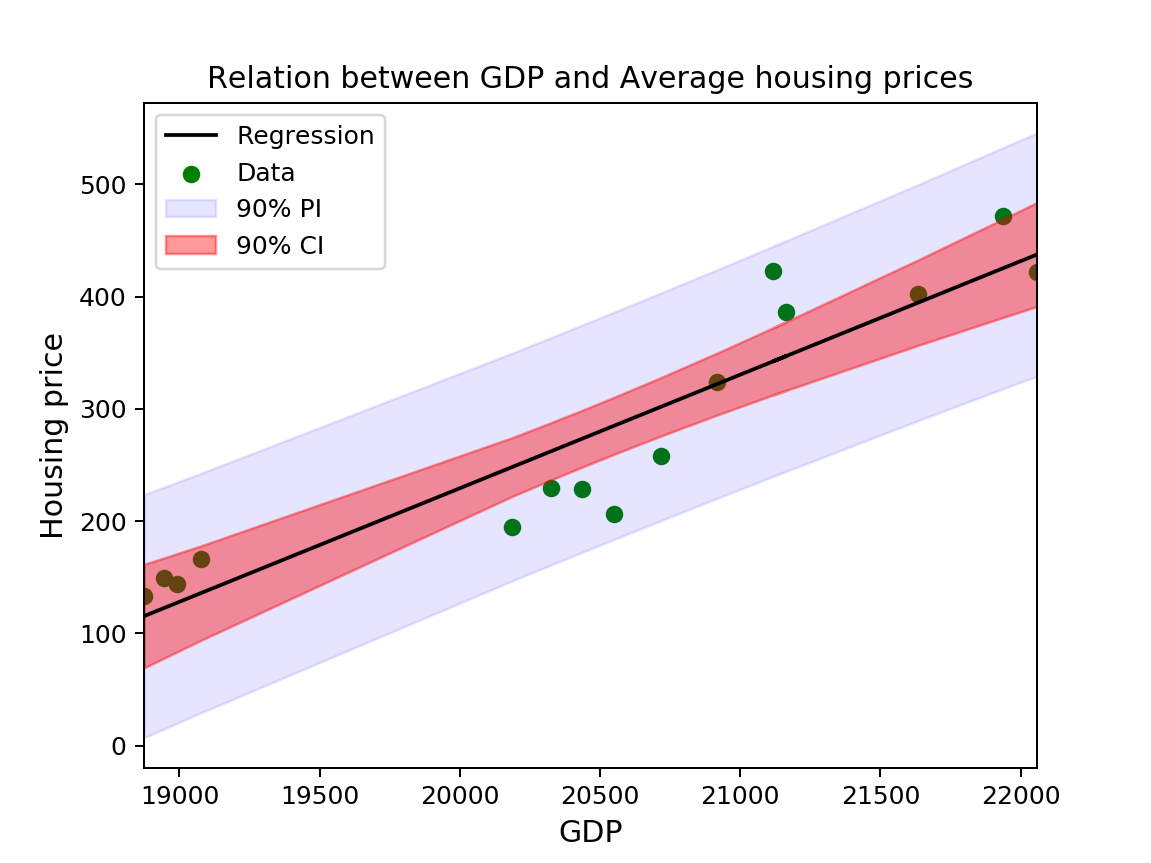

In [72]:
plt.figure()
y = df['house']
plt.scatter(df['gdp'], df['house'], label = "Data", color = "green")
plt.plot(df['gdp'], beta0 + beta1 * x, label = "Regression", color = "black")

plt.fill_between(df['gdp'], beta0 + beta1 * x - t_crit * np.sqrt(sigma2 * (1 + 1/len(y) + (x - x_bar)**2/((x-x_bar)**2).sum())), beta0 + beta1 * x + t_crit * np.sqrt(sigma2 * (1 + 1/len(y) + (x - x_bar)**2/((x-x_bar)**2).sum())), color = 'blue', alpha = 0.1, label = '90% PI')
plt.fill_between(df['gdp'], beta0 + beta1 * x - t_crit * np.sqrt(sigma2 * (1/len(y) + (x - x_bar)**2/((x-x_bar)**2).sum())), beta0 + beta1 * x + t_crit * np.sqrt(sigma2 * (1/len(y) + (x - x_bar)**2/((x-x_bar)**2).sum())), color = 'red', alpha = 0.4, label = '90% CI')

plt.legend()
plt.xlabel("GDP", fontsize = 12)
plt.ylabel("Housing price", fontsize = 12)
plt.title("Relation between GDP and Average housing prices")
plt.xlim(min(x), max(x))
plt.show()

### Question 7

En utilisant des classes/librairies existantes, donner l’intercept, la pente, le coefficient de détermination
ainsi que l’investissement prédit par le modèle quand GNP vaut 100. La classe
LinearRegression() de sklearn.linear_model est suggérée mais pas obligatoire. Vérifier que
les valeurs calculées ici coïncident avec celles des questions précédentes.

In [41]:
import sklearn.linear_model as lm

y = df['house']
x = df[['gdp']]

skl_linmod = lm.LinearRegression(fit_intercept = True).fit(x,y)

beta1_sk = skl_linmod.coef_[0]
beta0_sk = skl_linmod.intercept_

print("D'après les modules sklearn, l'estimation de beta1 est : " + str(round(beta1_sk,3)))
print("Et celle de Beta0 est : " + str(round(beta0_sk,3)))

D'après les modules sklearn, l'estimation de beta1 est : 0.101
Et celle de Beta0 est : -1794.086


In [72]:
#Testons si notre approche précédente donne des résultats similaires
np.isclose(beta1_sk, beta1)

True

In [73]:
np.isclose(beta0_sk, beta0)

True

Les estimations sont similaires.

### Question 8

Sur un graph avec échelle logarithmique, avec GNP en abscisse et investment en ordonnée, tracer
les données, la droite de régression, ainsi que l’investissement prédit par le modèle quand GNP vaut
1000 (on donnera à ce point une couleur différente).

<IPython.core.display.Javascript object>


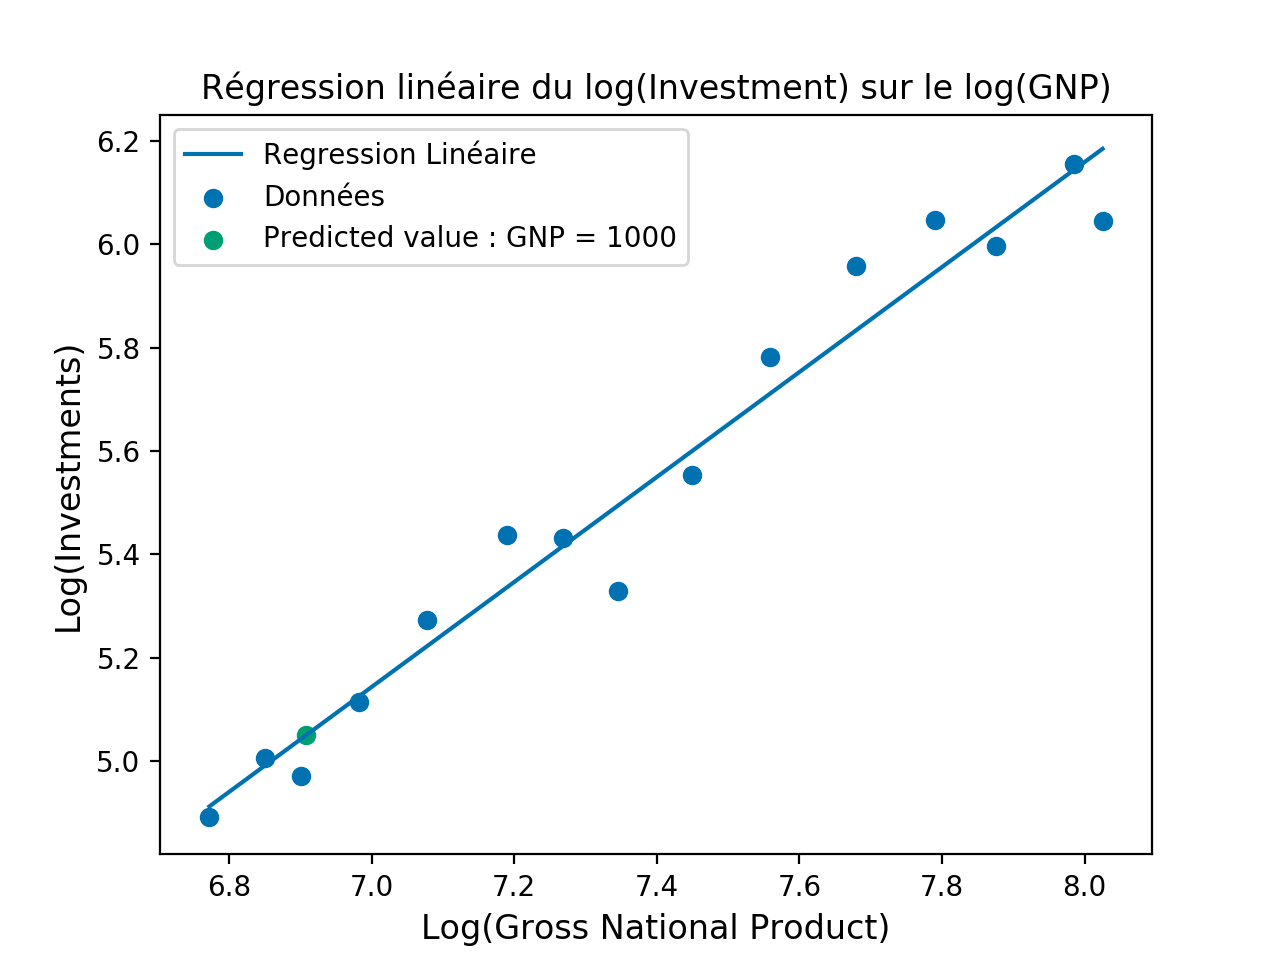

In [74]:
#On parle ici de prédiction, donc on inclut un bruit blanc 
plt.figure()
plt.scatter(x, y, label = "Données")
plt.plot(x, beta0_sk + beta1_sk * x, label = "Regression Linéaire")
plt.scatter(np.log(1000), beta0_sk + beta1_sk * np.log(1000), label = "Predicted value : GNP = 1000")
plt.xlabel("Log(Gross National Product)", fontsize = 12)
plt.ylabel("Log(Investments)", fontsize = 12)
plt.title("Régression linéaire du log(Investment) sur le log(GNP)")
plt.legend()
plt.show()

On introduit une nouvelle variable explicative, la variable interest (sans transformation logarithmique).
Les questions suivantes (9 à 12) doivent être réalisées par l’intermédiaire d’opérations
élémentaires, sans utiliser de librairies existantes (on utilisera par exemple inv et eig de
numpy.linalg).

### Question 9

Pour la régression de Investment sur GNP et interest, calculer la matrice de Gram. Est-elle de
rang plein ?

La matrice de Gram est donnée par XtX.
Ici, X comprend les variables GNP et Interest.

In [75]:
x = np.hstack([np.ones(shape=(len(y), 1)), df[['gnp', 'interest']]]).astype(float)
xt = x.transpose()
X_gram = x
gram = np.matmul(xt, x)

#La matrice est-elle symétrique?
symetric_test = gram[1,0] == gram[0,1]
print("Test de symétrie de la matrice G : " + str(symetric_test))

#Il reste reste à vérifier que ses valeurs propres sont ≠ 0 pour conclure quant à son invertibilité.
eigen_values = np.linalg.eig(gram)[0]

#Une valeur propre deviendra critiquement proche de 0 au seuil 10^-12. 
print(eigen_values)

#Nous sommes loin de ce stade, donc notre matrice est inversible. 
i_gram = inv(gram)

Test de symétrie de la matrice G : True
[1.73787190e+03 1.82369697e-02 4.12140362e+01]


La matrice de Gram est inversible, de rang 3, ce qui nous permttra d'appliquer les estimateurs OLS aux questions suivantes.

### Question 10

Pour la régression de Investment sur GNP et interest, estimer les 3 coefficients et leurs écarttypes
ainsi que le coefficient de détermination. En plus, faire un test de Student de significativité
de chaque coefficient (donner la statistique de test et la p-valeur). Afficher les résultats dans une
forme convenable. Discuter de la significativité des coefficients.

In [76]:
%%latex
On sait que :
\begin{equation}
\hat{\beta} = {(X^tX)^{-1}X^tY}
\end{equation}

<IPython.core.display.Latex object>

In [77]:
Beta = np.matmul(inv(gram), np.matmul(xt,y))

#Afficher les coefficient Beta0, Beta1 et Beta2
print("Estimateur de Beta0 : " + str(round(Beta[0],4)))
print("Estimateur de Beta1 : " + str(round(Beta[1],4)))
print("Estimateur de Beta2 : " + str(round(Beta[2],4)))

Estimateur de Beta0 : -2.1805
Estimateur de Beta1 : 1.0512
Estimateur de Beta2 : -0.0065


In [78]:
%%latex
Les variances des estimateurs de Beta sont :
\begin{equation}
\hat{\sigma}^2_j = \hat{\sigma}^2{(X^tX)^{-1}_{j,j}}
\end{equation}

<IPython.core.display.Latex object>

In [79]:
#Erreurs standads des coefficients 
sigma = math.sqrt(((y - Beta[0] - Beta[1] * xt[1] - Beta[2]*xt[2])**2).sum()/(len(y)-3))
sigma2 = sigma ** 2

se_beta0 = math.sqrt(sigma2 * inv(gram)[0,0])
se_beta1 = math.sqrt(sigma2 * inv(gram)[1,1])
se_beta2 = math.sqrt(sigma2 * inv(gram)[2,2])

print("Estimateur de l'écart-type de Beta0 : " + str(round(se_beta0,3)))
print("Estimateur de l'écart-type de Beta1 : " + str(round(se_beta1,3)))
print("Estimateur de l'écart-type de Beta2 : " + str(round(se_beta2,3)))

Estimateur de l'écart-type de Beta0 : 0.662
Estimateur de l'écart-type de Beta1 : 0.102
Estimateur de l'écart-type de Beta2 : 0.015


In [80]:
%%latex
Les statistiques de test dans des tests de nullité des estimateurs de Beta sont :
\begin{equation}
\hat{T}_j = \frac{\hat{\beta}_j} {\hat{\sigma}_j}
\end{equation}

<IPython.core.display.Latex object>

In [81]:
#Statistiques de tests de Student 
t0 = Beta[0]/se_beta0
t1 = Beta[1]/se_beta1
t2 = Beta[2]/se_beta2
print("Statistique de test pour Beta0 : " + str(round(t0,3)))
print("Statistique de test pour Beta1 : " + str(round(t1,3)))
print("Statistique de test pour Beta2 : " + str(round(t2,3)))

Statistique de test pour Beta0 : -3.292
Statistique de test pour Beta1 : 10.3
Statistique de test pour Beta2 : -0.425


In [82]:
#Intervalles de confiance
def significatif (param, se_param, valeur, df, t_test) :
    p = (1 - stats.t.cdf(abs(t_test), df)) * 2
    print("Le coefficient vaut : " + str(param))
    print("Son erreur standard est : " + str(se_param))
    print("La p-value est : " + str(p))
    print
    for alpha in [0.9, 0.95, 0.99, 0.999] :
        c0 = param - stats.t.ppf(alpha,df) * se_param
        c1 = param + stats.t.ppf(alpha,df) * se_param
        if (valeur > c0 and valeur < c1) :
            print("Pas significatif à : " + str(alpha*100) + " %.")
        else : 
            print("Significatif à : " + str(alpha*100) + " %.")
    

#Pour Beta0
significatif(Beta[0], se_beta0, 0, len(y)-3, t0)

Le coefficient vaut : -2.180454725913023
Son erreur standard est : 0.6623991977962966
La p-value est : 0.006438367050901617
Significatif à : 90.0 %.
Significatif à : 95.0 %.
Significatif à : 99.0 %.
Pas significatif à : 99.9 %.


In [83]:
#Pour Beta1
significatif(Beta[1], se_beta1, 0, len(y)-3, t1)

Le coefficient vaut : 1.0512426913198425
Son erreur standard est : 0.102061378061912
La p-value est : 2.5995168484449493e-07
Significatif à : 90.0 %.
Significatif à : 95.0 %.
Significatif à : 99.0 %.
Significatif à : 99.9 %.


In [84]:
#Pour Beta2
significatif(Beta[2], se_beta2, 0, len(y)-3, t2)

Le coefficient vaut : -0.006528879406090482
Son erreur standard est : 0.015344205065603146
La p-value est : 0.6780071418828217
Pas significatif à : 90.0 %.
Pas significatif à : 95.0 %.
Pas significatif à : 99.0 %.
Pas significatif à : 99.9 %.


In [85]:
#Coefficient de détermination
x = pd.DataFrame(np.hstack((np.ones(shape=(len(df['gnp']), 1)), df[['gnp', 'interest']])))
x1 = x[1]
x2 = x[2]

numerator = 0
denominator = 0
for i in range(len(y)) :
    numerator = numerator + (y[i] - Beta[0] - Beta[1] * x1[i] - Beta[2] * x2[i])**2
    denominator = denominator + (y[i]-y_bar)**2
r_carre = 1 - numerator/denominator
print("Le nouveau R^2 est de : " + str(round(r_carre,5)) + ". Ceci illustre l'augmentation du R^2 même à l'ajout de variables non-significatives et justifie le développement de mesure alternatives comme le R^2 ajusté")

Le nouveau R^2 est de : 0.96331. Ceci illustre l'augmentation du R^2 même à l'ajout de variables non-significatives et justifie le développement de mesure alternatives comme le R^2 ajusté


Ainsi, le paramètre Investment n'est pas significativement différent de 0 ce qui conduit au non-rejet de l'hypothèse nulle.

### Question 11

Pour les valeurs de GNP 1000 et interest 10, i.e., x = (1,1000,10)T, prédire log(investment) et donner les intervalles de confiance CI et PI au niveau 99.9%.

In [86]:
%%latex
La prédiction est donnée par :
\begin{equation}
{Y}_{pred} = {\hat{\beta}_0} + {\hat{\beta}_1{X}_{1j}} + {\hat{\beta}_2{X}_{2j}} + {\epsilon}_j
\end{equation}

<IPython.core.display.Latex object>

In [87]:
%%latex
Rappelons également que :
\begin{equation}
{\epsilon} ∼ {N(0,{\sigma}^2)}
\end{equation}

<IPython.core.display.Latex object>

In [88]:
#Prediction pour le point (1, 1000, 10)
x0 = [1, np.log(1000), 10]

y_pred = float((Beta[0]*x0[0] + Beta[1] * x0[1] + Beta[2] * x0[2]) + np.random.normal(0,sigma2))
y_hat = float(Beta[0]*x0[0] + Beta[1] * x0[1] + Beta[2] * x0[2])

#Intervalle de confiance
x0 = np.asmatrix(x0)
sigma_pred = math.sqrt(sigma2*(1 + np.matmul(np.matmul(x0, inv(gram)),x0.T)))
sigma_est = math.sqrt(sigma2*(np.matmul(np.matmul(x0, inv(gram)),x0.T)))

t_crit = stats.t.ppf(0.9995,len(y)-3)
p0 = y_hat - t_crit * sigma_pred
p1 = y_hat + t_crit * sigma_pred

c0 = y_hat - t_crit * sigma_est
c1 = y_hat + t_crit * sigma_est

print ("Valeur prédite : %f" % y_pred)
print ("Intervalle de confiance autour de la valeur estimée = [ %f, %f]" % (c0, c1))
print ("Intervalle de confiance autour de la valeur prédite = [ %f, %f]" % (p0, p1))

Valeur prédite : 5.032962
Intervalle de confiance autour de la valeur estimée = [ 4.640184, 5.391783]
Intervalle de confiance autour de la valeur prédite = [ 4.473803, 5.558164]


### Question 12

Sur un même graph à 3 dimensions avec les axes suivants : log(GNP), Interest, and log(Investment),
tracer les données, le “plan” de régression et les surfaces correspondantes aux intervalles de confiance
à 99.9% (ces surfaces seront tracées sur le domaine de définition des données).

In [89]:
x = pd.DataFrame(np.hstack((np.ones(shape=(len(df['gnp']), 1)), df[['gnp', 'interest']])))
x1 = x.T[1]
print(x1)

0    1.000000
1    6.850126
2    5.870000
Name: 1, dtype: float64


<IPython.core.display.Javascript object>


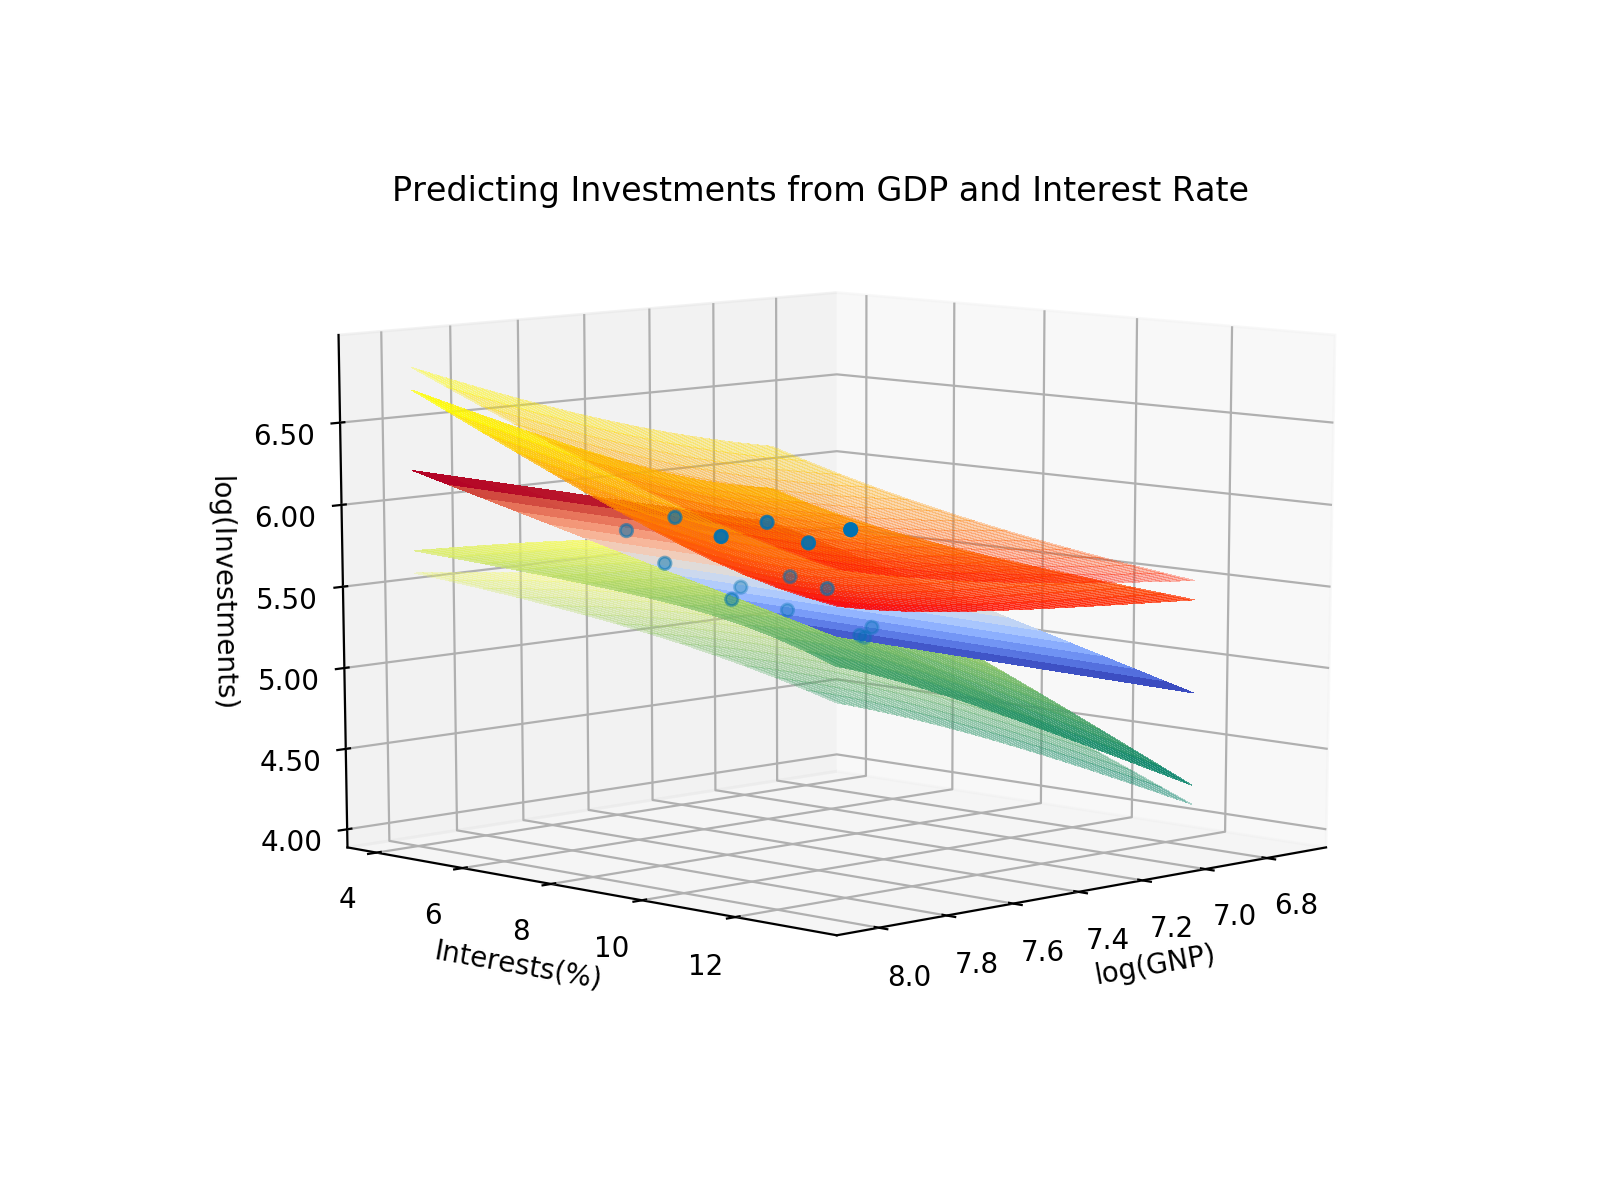

In [90]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

t_crit = stats.t.ppf(0.9995,df= len(y) - 3)

b0 = Beta[0]
b1 = Beta[1]
b2 = Beta[2]

fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(6.7, 8.1, 0.1)
Y = np.arange(4, 12, 0.1)

X, Y = np.meshgrid(X, Y)
Z = b0 + b1*X + b2*Y

PI_upper = b0 + b1*X + b2*Y + t_crit * sigma * np.sqrt(1 + (i_gram[0][0] + X*i_gram[1][0]+Y*i_gram[2][0])+X*(i_gram[0][1] + X*i_gram[1][1]+Y*i_gram[2][1])+Y*(i_gram[0][2] + X*i_gram[1][2]+Y*i_gram[2][2]))
PI_lower = b0 + b1*X + b2*Y - t_crit * sigma * np.sqrt(1 + (i_gram[0][0] + X*i_gram[1][0]+Y*i_gram[2][0])+X*(i_gram[0][1] + X*i_gram[1][1]+Y*i_gram[2][1])+Y*(i_gram[0][2] + X*i_gram[1][2]+Y*i_gram[2][2]))

CI_upper = b0 + b1*X + b2*Y + t_crit * sigma * np.sqrt((i_gram[0][0] + X*i_gram[1][0]+Y*i_gram[2][0])+X*(i_gram[0][1] + X*i_gram[1][1]+Y*i_gram[2][1])+Y*(i_gram[0][2] + X*i_gram[1][2]+Y*i_gram[2][2]))
CI_lower = b0 + b1*X + b2*Y - t_crit * sigma * np.sqrt((i_gram[0][0] + X*i_gram[1][0]+Y*i_gram[2][0])+X*(i_gram[0][1] + X*i_gram[1][1]+Y*i_gram[2][1])+Y*(i_gram[0][2] + X*i_gram[1][2]+Y*i_gram[2][2]))

# Plot the surface.
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False, label = "estimate")

ax.plot_surface(X, Y, PI_upper, cmap=cm.autumn,linewidth=0, alpha=0.3, antialiased=False, label = "lower CI")
ax.plot_surface(X, Y, PI_lower, cmap=cm.summer,linewidth=0, alpha=0.3, antialiased=False, label = "upper CI")

ax.plot_surface(X, Y, CI_upper, cmap=cm.autumn,linewidth=0, alpha=0.7, antialiased=False, label = "lower CI")
ax.plot_surface(X, Y, CI_lower, cmap=cm.summer,linewidth=0, alpha=0.7, antialiased=False, label = "upper CI")

ax.scatter(df['gnp'], df['interest'],  df['invest'])
# Customize the z axis.
#ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_xlabel("log(GNP)")
ax.set_ylabel("Interests(%)")
ax.set_zlabel("log(Investments)")
ax.set_title("Predicting Investments from GDP and Interest Rate")
ax.view_init(10, 45)
plt.show()

### Question 13

En utilisant des classes/librairies existantes, donner les coefficients de régression, le coefficient de
détermination ainsi que l’investissement prédit par le modèle quand GNP vaut 1000 et interest 10. La classe LinearRegression() de sklearn.linear_model est suggérée mais pas obligatoire.
Vérifier que les valeurs calculées ici coïncident avec celles des questions précédentes.

In [91]:
#En utilisant le paclage sm.OLS, on estime les paramètres puis on les teste 1 à 1
results = sm.OLS(y, x).fit().params
print(results)

0   -2.180455
1    1.051243
2   -0.006529
dtype: float64


In [92]:
np.isclose(results[0], Beta[0])

True

In [93]:
np.isclose(results[1], Beta[1])

True

In [94]:
np.isclose(results[2], Beta[2])

True

Tous nos paramètres semblent cohérents avec les estimations précédentes ce qui conforte nos résultats.

Merci d'être arrivé au bout de la correction. Voici un Sapin de Noël en cadeau ! ;)

<IPython.core.display.Javascript object>


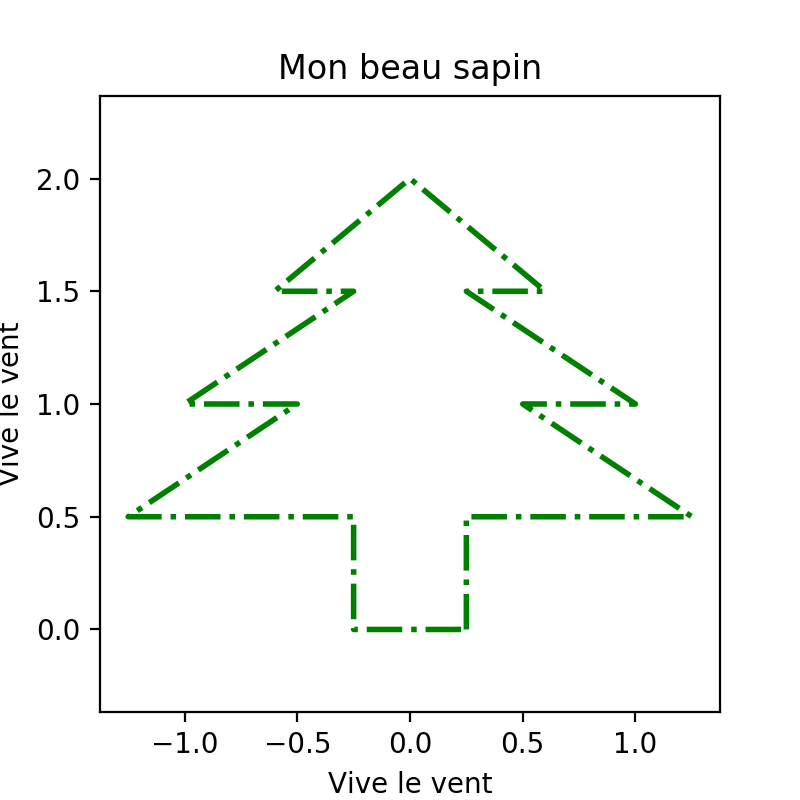

In [95]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(4,4))
x = [0.25, 0.25, 1.25, 0.5, 1, 0.25, 0.6, 0, -0.6, -0.25, -1, -0.5, -1.25, -0.25, -0.25, 0.25]
y = [0, 0.5, 0.5, 1, 1, 1.5, 1.5, 2, 1.5 , 1.5, 1, 1, 0.5, 0.5, 0, 0]
plt.plot(x, y, '-.', color = "green", lw = 2)
plt.title("Mon beau sapin")
plt.axis('equal')
plt.xlabel("Vive le vent")
plt.ylabel("Vive le vent")
plt.show()